### Problem Statement:
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

In [3]:
! pip install matplotlib

  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp38-cp38-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp38-cp38-win_amd64.whl (1.5 MB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl (55 kB)
Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl (2.6 MB)
U

In [4]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the src folder to the system path
sys.path.append(os.path.abspath('../src'))

import logger

# Log the start of the notebook
logger.logging.info('importing necessary libraries for EDA')

##### Data Exploration

In [2]:
df=pd.read_csv('../data/train.csv')
logger.logging.info(f'reading data {df.head()}')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


`Item_Identifier:`           Unique product ID
 
`Item_Weight:`               Weight of product

`Item_Fat_Content:`          Whether the product is low fat or not'

`Item_Visibility:`           The % of total display area of all products in a store allocated to the
particular product

`Item_Type:`                 The category to which the product belongs

`Item_MRP:`                  Maximum Retail Price (list price) of the product

`Outlet_Identifier:`         Unique store ID

`Outlet_Establishment_Year:` The year in which store was established

`Outlet_Size:`               The size of the store in terms of ground area covered

`Outlet_Location_Type:`      The type of city in which the store is located

`Outlet_Type:`               Whether the outlet is just a grocery store or some sort of supermarket

`Item_Outlet_Sales:`         Sales of the product in the particulat store. This is the outcome
variable to be predicted.

In [3]:
data=df.copy()

In [4]:
data.tail() #printing last 5 rows of dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
data.info() #checking datatypes of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
logger.logging.info('exploring the dataset')
data.shape

(8523, 12)

##### Data Cleaning 

**`Missing Values`**

In [7]:
# Check for missing values
logger.logging.info(f'count of null values \n {data.isna().sum()}')
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [8]:
data['Item_Weight'].info()  #checking data type of Item_Weight columns

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Weight
Non-Null Count  Dtype  
--------------  -----  
7060 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


In [9]:
data['Outlet_Size'].info() #checking data type of Outlet_Size columns

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Outlet_Size
Non-Null Count  Dtype 
--------------  ----- 
6113 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Cross checking and correcting Each columns `values` and `DataTypes`** 

In [11]:
#checking dtypes and value count of Item_Identifier
logger.logging.info('Cross checking and correcting Each columns `values` and `DataTypes`')
print(data['Item_Identifier'].dtype)
data['Item_Identifier'].value_counts()

object


Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [12]:
#checking dtypes and value count of Item_Weight
print(data['Item_Weight'].dtype)
data['Item_Weight'].value_counts()

float64


Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [13]:
#checking dtypes and value count of Item_Fat_Content
print(data['Item_Fat_Content'].dtype)
data['Item_Fat_Content'].value_counts()

object


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [14]:
#checking dtypes and value count of Item_Visibility
print(data['Item_Visibility'].dtype)
data['Item_Visibility'].value_counts()

float64


Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [15]:
#checking dtypes and value count of Item_Type
print(data['Item_Type'].dtype)
data['Item_Type'].value_counts()

object


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [16]:
#checking dtypes and value count of Item_MRP
print(data['Item_MRP'].dtypes)
data['Item_MRP'].value_counts()

float64


Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: count, Length: 5938, dtype: int64

In [17]:
#checking dtypes and value count of Outlet_Identifier
print(data['Outlet_Identifier'].dtype)
data['Outlet_Identifier'].value_counts()

object


Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [18]:
#checking dtypes and value count of Outlet_Establishment_Year
print(data['Outlet_Establishment_Year'].dtype)
data['Outlet_Establishment_Year'].value_counts()

int64


Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [19]:
#checking dtypes and value count of Outlet_Size
print(data['Outlet_Size'].dtype)
data['Outlet_Size'].value_counts()

object


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [20]:
#checking dtypes and value count of Outlet_Location_Type
print(data['Outlet_Location_Type'].dtype)
data['Outlet_Location_Type'].value_counts()

object


Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [21]:
#checking dtypes and value count of Outlet_Type
print(data['Outlet_Type'].dtype)
data['Outlet_Type'].value_counts()

object


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [22]:
#checking dtypes and value count of Item_Outlet_Sales
print(data['Item_Outlet_Sales'].dtype)
data['Item_Outlet_Sales'].value_counts()

float64


Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: count, Length: 3493, dtype: int64

In [23]:
#checking nulls 
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### `Visualisation`

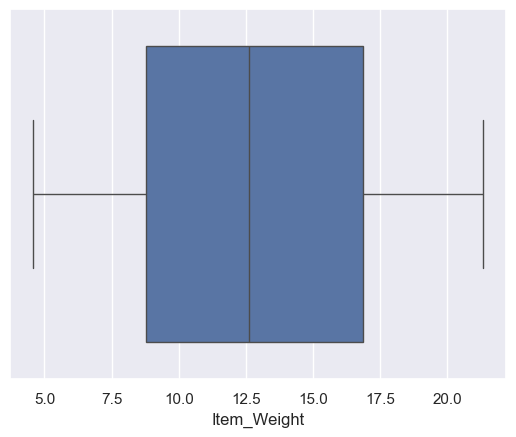

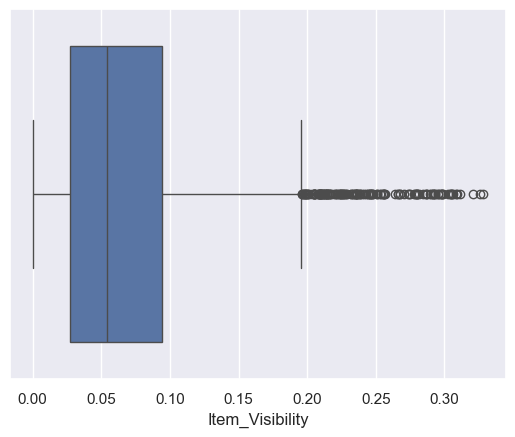

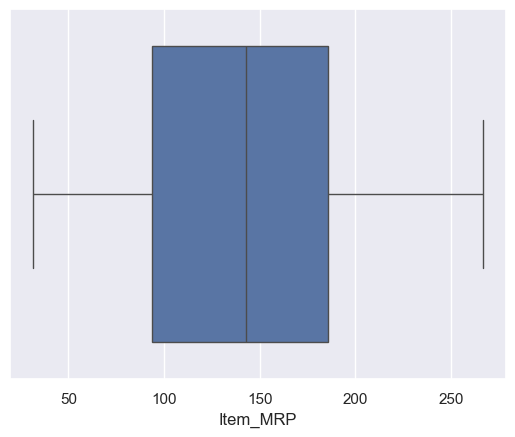

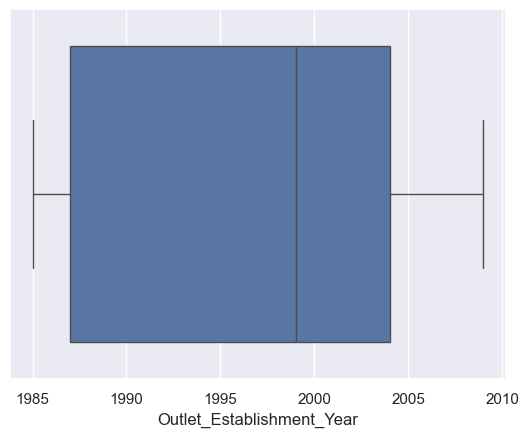

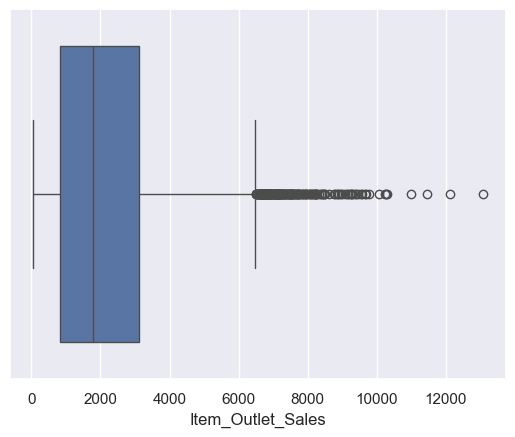

In [24]:
sns.set()
col=data.columns
logger.logging.info('printing box plot for numeric data')
for i in col:
    if data[i].dtype!='object':
        sns.boxplot(data=data,x=data[i])
        plt.show()

In [25]:
#discrptive statistics of dataset
logger.logging.info(f'Descriptive statistics {data.describe()}')
data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
import warnings
warnings.filterwarnings('ignore')
logger.logging.info('importing warnings')

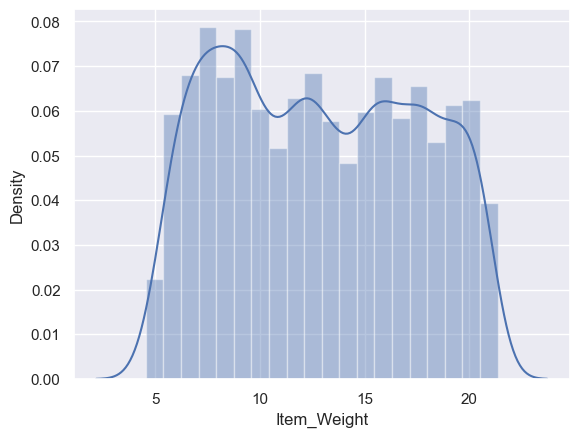

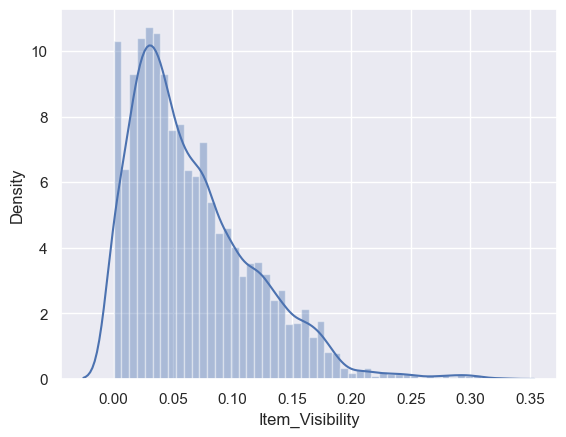

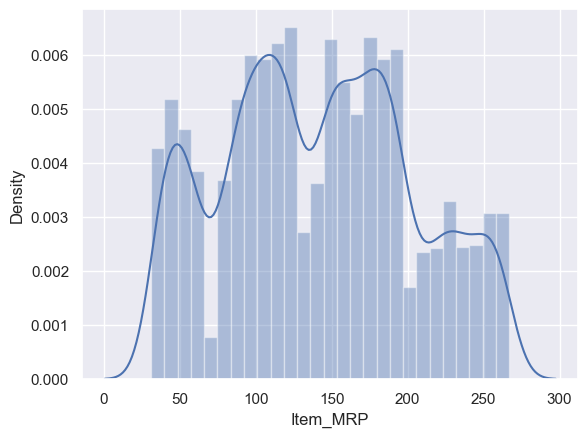

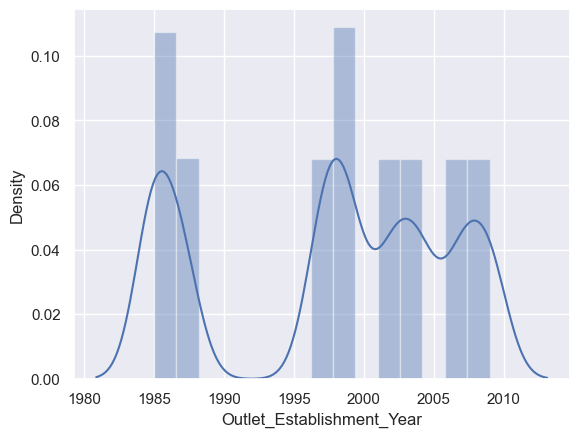

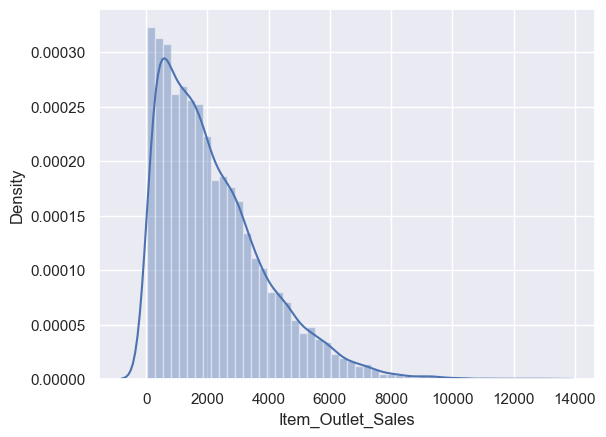

In [27]:
logger.logging.info(f'checking distribution of columns')
col=data.columns
for i in col:
    if data[i].dtype!='object':
        sns.distplot(data[i])
        plt.show()

<Axes: >

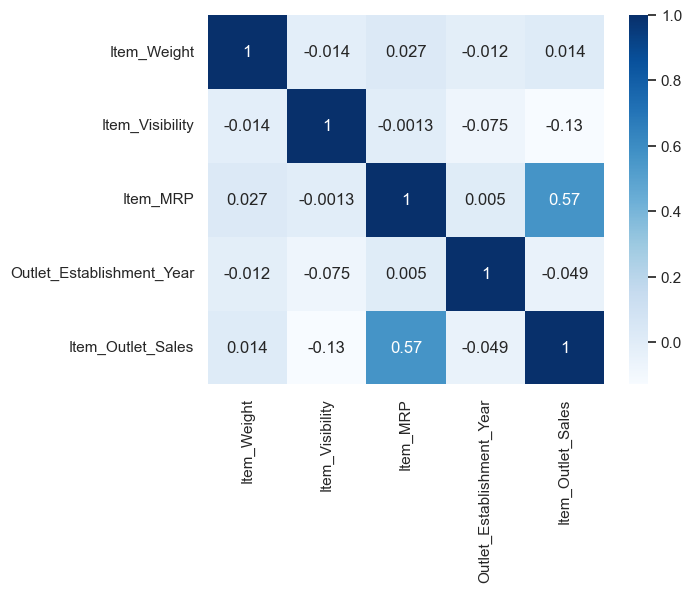

In [28]:
corr=df.select_dtypes(include=['number']).corr()
heat=sns.heatmap(corr,cmap='Blues',annot=True)
logger.logging.info(f'uderstanding correlation between numeric columns/n {heat}')
heat

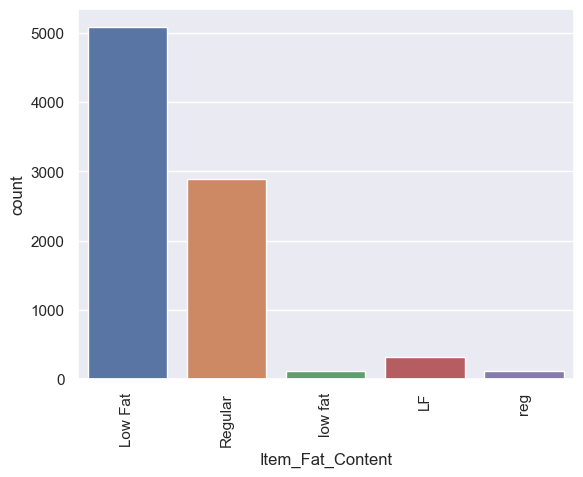

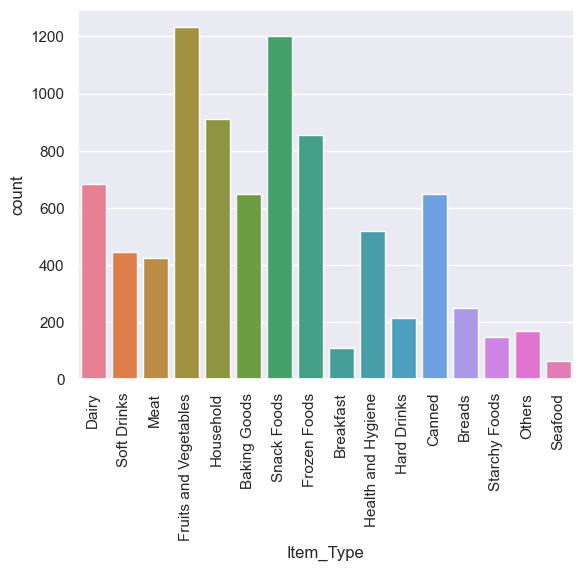

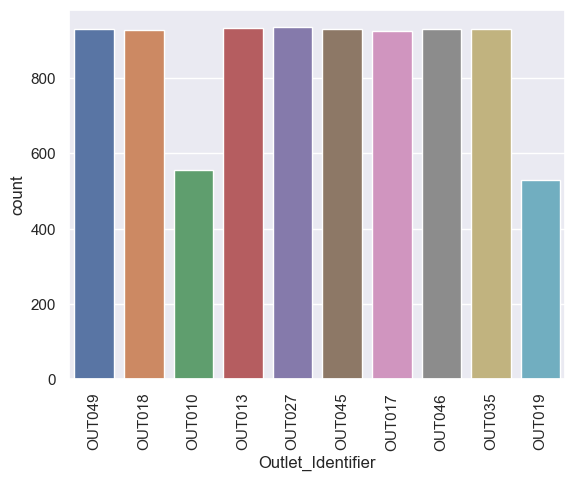

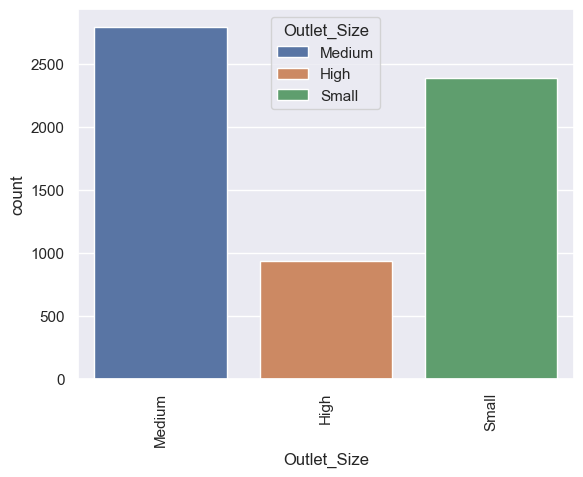

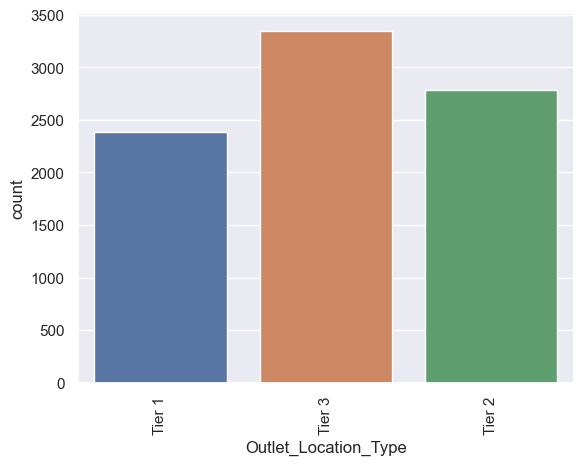

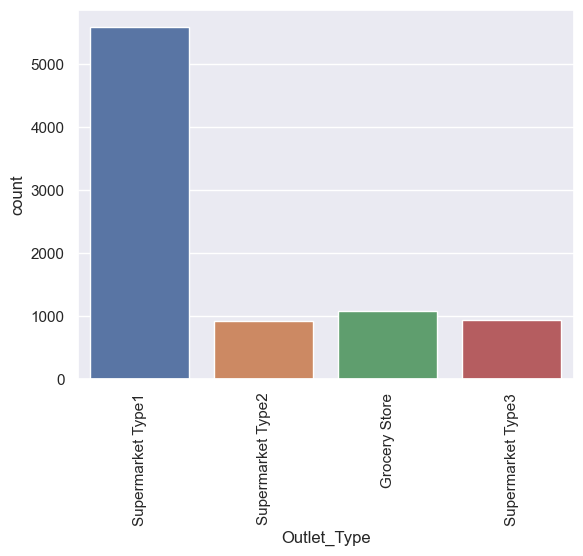

In [52]:
columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
logger.logging.info(f'diplaying countplot for categorical columns:\n {columns} ')
for i in columns:
    sns.countplot(data=data,x=i,hue=i)
    plt.xticks(rotation=90)
    plt.show()

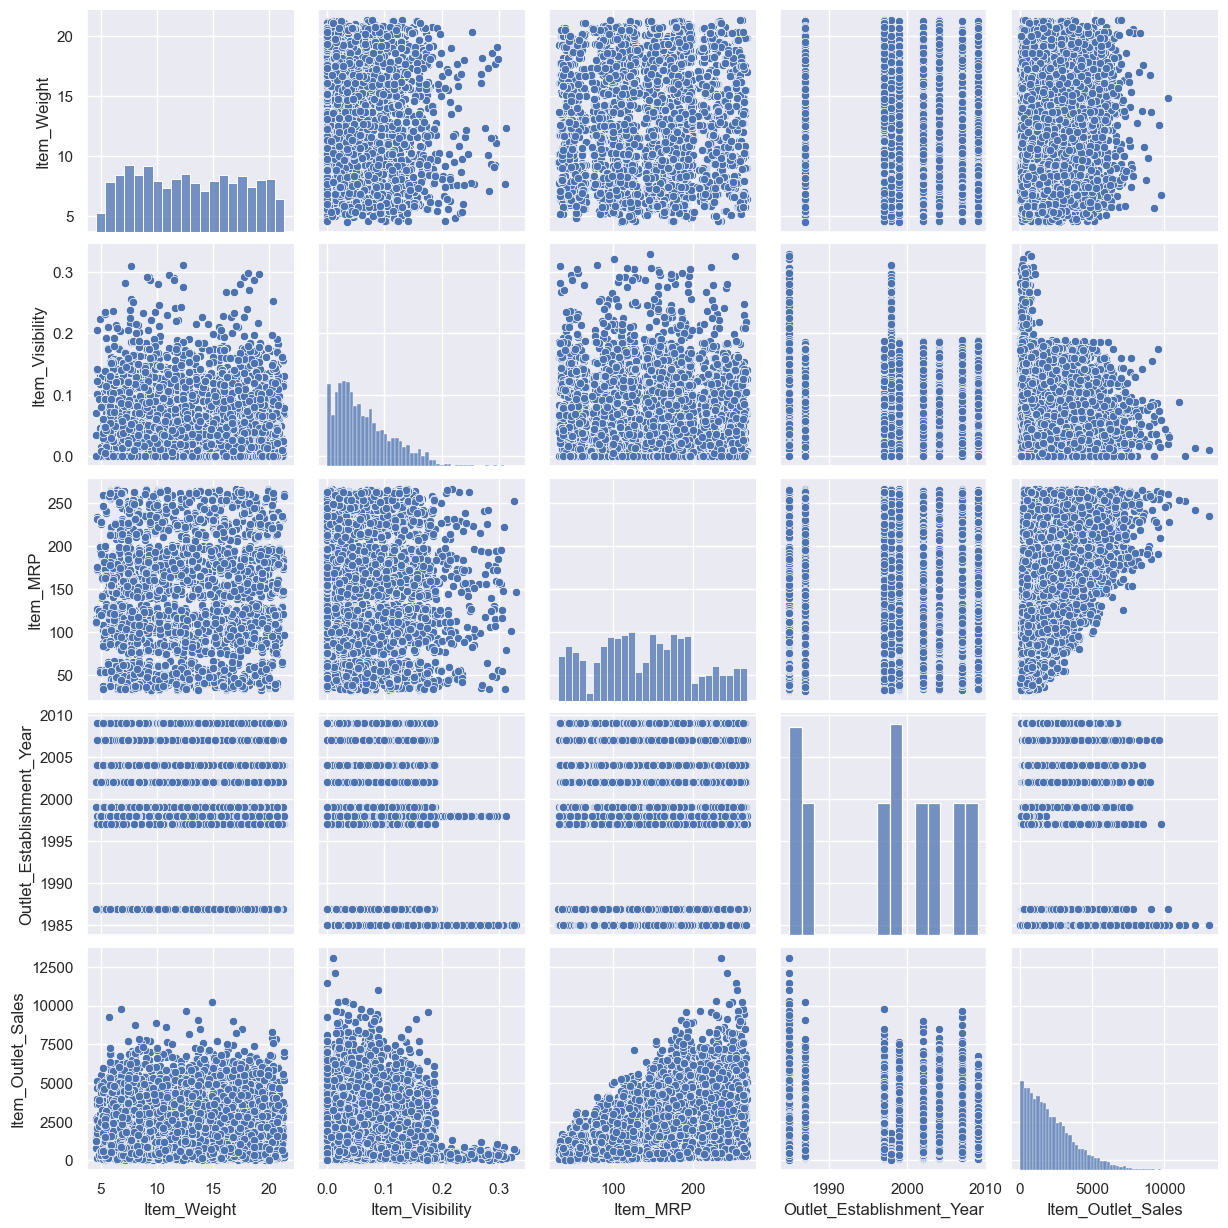

In [53]:
logger.logging.info('displaying pairplots for numeric data which draw relationship between 2 ciolumns')
sns.pairplot(data)
plt.show()
        